In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [117]:
df =pd.read_csv('/home/barbaros/Desktop/Aı/Startup/50_Startups.csv')
#isimlendirme
"""sf=st.rename(columns ={'R&D Spend':'rd','Administration':'ad','Marketing Spend':'ms'}, inplace =False)"""

"sf=st.rename(columns ={'R&D Spend':'rd','Administration':'ad','Marketing Spend':'ms'}, inplace =False)"

In [118]:
dummies_list = ['State']
data=df.copy()
for i in dummies_list:
    
    temp_df = pd.get_dummies(eval('data' + '.' + i), drop_first=True)
    
    data = pd.concat([data, temp_df], axis=1)
    
    data.drop([i], axis=1, inplace=True)
data.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [119]:
cols=data.columns.values.tolist()
cols

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'Profit',
 'Florida',
 'New York']

In [120]:
for i in cols:
    isim=i.split(' ')
    str1=''
    for z in isim:
        str1+=z
    data.rename(columns={i: str1}, inplace=True)
data.columns=data.columns.str.lower()
data.head()
cols=data.columns.values.tolist()
cols

['r&dspend',
 'administration',
 'marketingspend',
 'profit',
 'florida',
 'newyork']

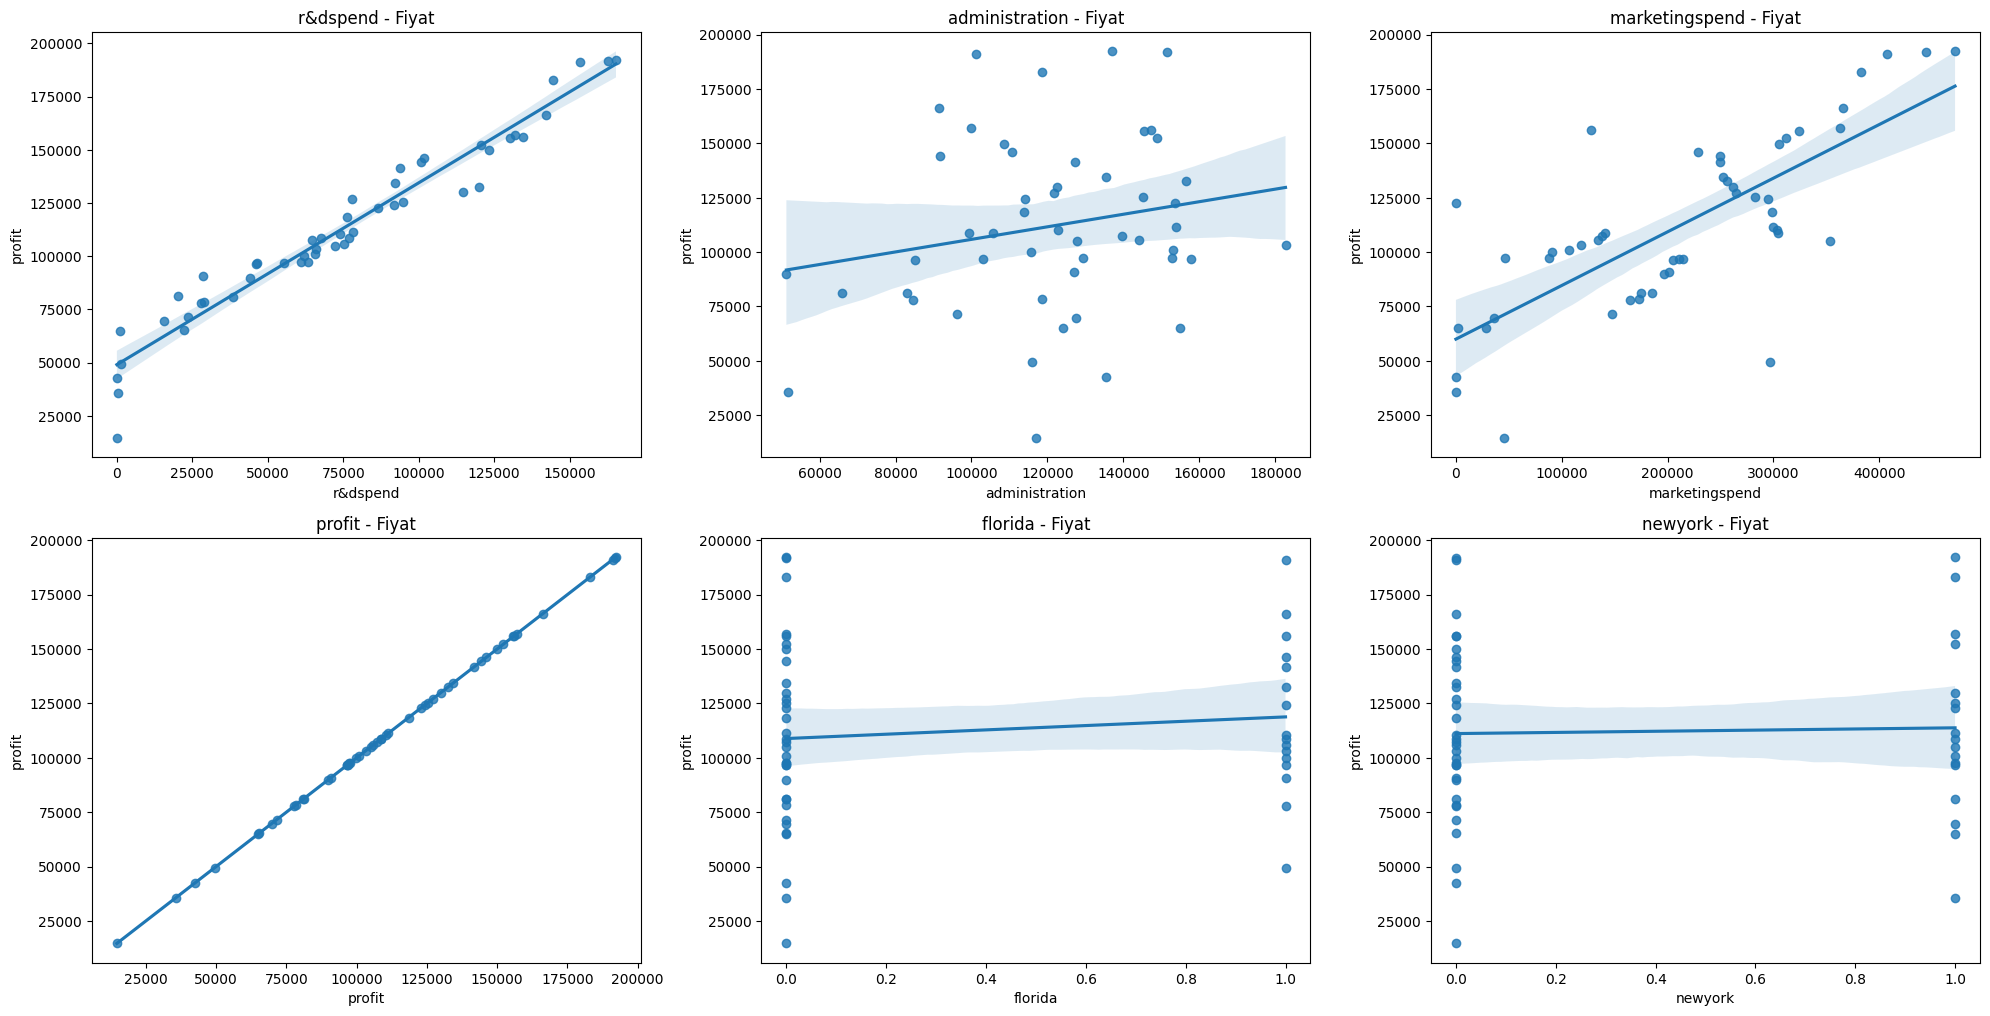

In [121]:

plt.figure(figsize=(20,25))

for i in range(len(cols)):

    u=str(cols[i])
    plt.subplot(5,3,i+1)
    plt.title(cols[i] + ' - Fiyat')

    sns.regplot(x=data[u], y=data['profit'])
    
plt.tight_layout()

In [122]:
train_data, test_data = train_test_split(data, train_size=0.7, random_state=42)

In [123]:
scaler=MinMaxScaler()
scale_cols=['r&dspend',
 'administration',
 'marketingspend']
train_data[scale_cols]=scaler.fit_transform( train_data[scale_cols])
train_data.head()

,r&dspend,administration,marketingspend,profit,florida,newyork
6,0.814128,0.696252,0.270710,156122.51,0,0
41,0.168691,0.160782,0.348614,77798.83,1,0
46,0.007956,0.427329,0.629768,49490.75,1,0
47,0.000000,0.595376,0.000000,42559.73,0,0
15,0.692617,0.485605,0.554864,129917.04,0,1


In [124]:
y_train=train_data.pop('profit')
y_train

6     156122.51
41     77798.83
46     49490.75
47     42559.73
15    129917.04
9     149759.96
16    126992.93
24    108552.04
34     96712.80
31     97483.56
0     192261.83
44     65200.33
27    105008.31
33     96778.92
5     156991.12
29    101004.64
11    144259.40
36     90708.19
1     191792.06
21    111313.02
2     191050.39
43     69758.98
35     96479.51
23    108733.99
40     78239.91
10    146121.95
22    110352.25
18    124266.90
49     14681.40
20    118474.03
7     155752.60
42     71498.49
14    132602.65
28    103282.38
38     81229.06
Name: profit, dtype: float64

<AxesSubplot: >

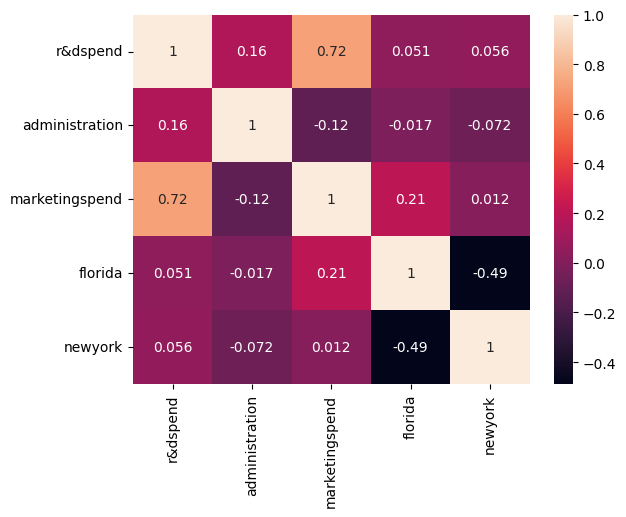

In [125]:
X_train=train_data
sns.heatmap(X_train.corr(), annot=True)

In [126]:
lr=LinearRegression()
lr.fit(X_train,y_train)

def train_ols(X,y):
    X = sm.add_constant(X)
    lfit= sm.OLS(y,X).fit()
    print(lfit.summary())
    

In [127]:
rfe=RFE(lr, n_features_to_select=3)
rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('r&dspend', True, 1),
 ('administration', True, 1),
 ('marketingspend', True, 1),
 ('florida', False, 3),
 ('newyork', False, 2)]

In [128]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [129]:
train_ols(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     199.9
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           2.32e-20
Time:                        16:09:55   Log-Likelihood:                -368.56
No. Observations:                  35   AIC:                             745.1
Df Residuals:                      31   BIC:                             751.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.091e+04   5550.717      9.

In [130]:
if 'administration' in X_train_rfe.columns :
    X_train_rfe=X_train_rfe.drop(['administration'],axis=1)
else:
    pass

train_ols(X_train_rfe,y_train)
X_train_rfe.head()


                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     293.3
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           2.63e-21
Time:                        16:09:55   Log-Likelihood:                -369.46
No. Observations:                  35   AIC:                             744.9
Df Residuals:                      32   BIC:                             749.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.552e+04   3637.611     12.

,r&dspend,marketingspend
6,0.814128,0.270710
41,0.168691,0.348614
46,0.007956,0.629768
47,0.000000,0.000000
15,0.692617,0.554864


In [131]:
if 'marketingspend' in X_train_rfe.columns :
    X_train_rfe=X_train_rfe.drop(['marketingspend'],axis=1)
else:
    pass

train_ols(X_train_rfe,y_train)
X_train_rfe.head()


                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     540.1
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           4.97e-22
Time:                        16:09:55   Log-Likelihood:                -371.33
No. Observations:                  35   AIC:                             746.7
Df Residuals:                      33   BIC:                             749.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        4.93e+04   3164.806     15.577      0.0

,r&dspend
6,0.814128
41,0.168691
46,0.007956
47,0.000000
15,0.692617
